<a href="https://colab.research.google.com/github/DameAeternus/VNP/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

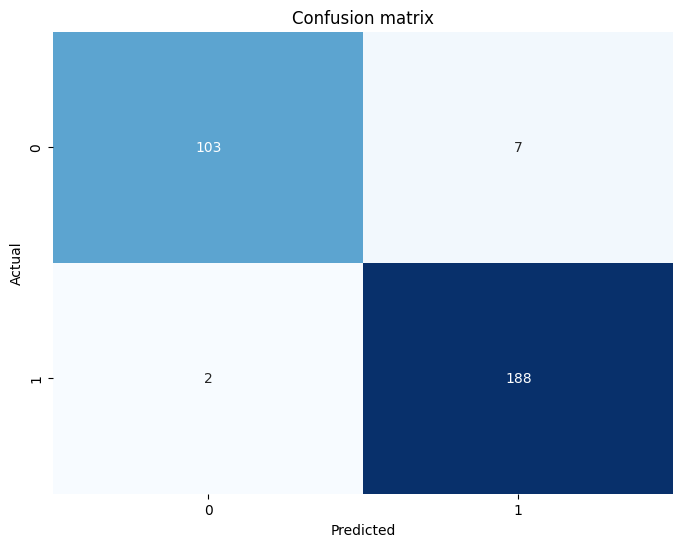

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/fake_bills.csv',sep=";")
print(df)
le=LabelEncoder()

df['margin_low']= le.fit_transform(df['margin_low'])
df['is_genuine']=df['is_genuine'].map({True:1,False:0})
df['margin_low'].unique()
print(df)


X= df.iloc[:,1:]
y= df['is_genuine'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

accuracy= accuracy_score(y_test,y_pred)
print(f'Test accuracy: {accuracy:.2f}')

conf_matrix=confusion_matrix(y_test,y_pred)
conf_df= pd.DataFrame(conf_matrix,index=sorted(set(y)),columns=sorted(set(y)))

plt.figure(figsize=(8,6))
sns.heatmap(conf_df,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title("Confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='mean')
df[['margin_low']]=imputer.fit_transform(df[['margin_low']])
imputer=imputer.fit(df)
df=imputer.transform(df)
print(df)

[[  1.   171.81 104.86 ... 118.     2.89 112.83]
 [  1.   171.46 103.36 ...  43.     2.99 113.09]
 [  1.   172.69 104.48 ... 106.     2.94 113.16]
 ...
 [  0.   171.8  104.01 ... 214.     3.36 111.95]
 [  0.   172.06 104.28 ... 181.     3.46 112.25]
 [  0.   171.47 104.15 ... 129.     3.37 112.07]]


In [ ]:

X= df['diagonal','height_left','height_right','margin_low','margin_up'].values
y= df['is_genuine'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

accuracy= accuracy_score(y_test,y_pred)
print(f'Test accuracy: {accuracy:.2f}')

IndexError: ignored